import textblob
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [61]:
all_keys=open('twitterkeys','r').read().splitlines()

In [63]:
api_key=all_keys[0]
api_key_secret=all_keys[1]
access_token=all_keys[2]
access_token_secret=all_keys[3]

In [64]:
authenticator = tweepy.OAuthHandler(api_key,api_key_secret)

In [65]:
authenticator.set_access_token(access_token, access_token_secret)

In [66]:
api=tweepy.API(authenticator, wait_on_rate_limit=True)

In [67]:
crypto_currency='Bitcoin'

In [68]:
start='2021-6-21'
end='2021-6-22'

In [69]:
search=f'#{crypto_currency}-filter:retweets'

In [70]:
tweet_cursor=tweepy.Cursor(api.search,q=search,lang='en',tweet_mode='extended').items(500)

In [71]:
tweets=[tweet.full_text for tweet in tweet_cursor]

In [72]:
tweets_df=pd.DataFrame(tweets,columns=['Tweets'])

In [73]:
for _, row in tweets_df.iterrows():
    row['Tweets']=re.sub('http\S+','',row['Tweets'])
    row['Tweets']=re.sub('#\S+','',row['Tweets'])
    row['Tweets']=re.sub('@\S+','',row['Tweets'])
    row['Tweets']=re.sub('\\n+','',row['Tweets'])

In [74]:
tweets_df['Polarity']=tweets_df['Tweets'].map(lambda tweet: textblob.TextBlob(tweet).sentiment.polarity)

In [75]:
tweets_df['Result']=tweets_df['Polarity'].map(lambda pol: '+' if pol > 0 else '-')

In [76]:
positive=tweets_df[tweets_df.Result == '+'].count()['Tweets']
negative=tweets_df[tweets_df.Result == '-'].count()['Tweets']

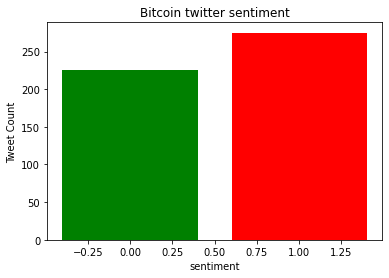

In [77]:
plt.bar([0,1],[positive,negative],label=['Positive','Negative'], color=['green','red'])
plt.title(f'{crypto_currency} twitter sentiment')
plt.ylabel('Tweet Count')
plt.xlabel('sentiment')
plt.show()